In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [3]:
data=pd.read_csv("car_price_prediction.csv")

In [4]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [5]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [8]:
data.shape

(19237, 18)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [11]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [12]:
data.duplicated().sum()

313

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
## Changing the data type of ‘Engine volume’ column after cleaning

In [15]:
data['Engine volume']=data['Engine volume'].str.replace(r'[^\d.]+','').astype(float)

In [20]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [21]:
##Dropping the ID column as it is having no importance

In [22]:
data.drop(columns="ID", inplace=True)

In [23]:
data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

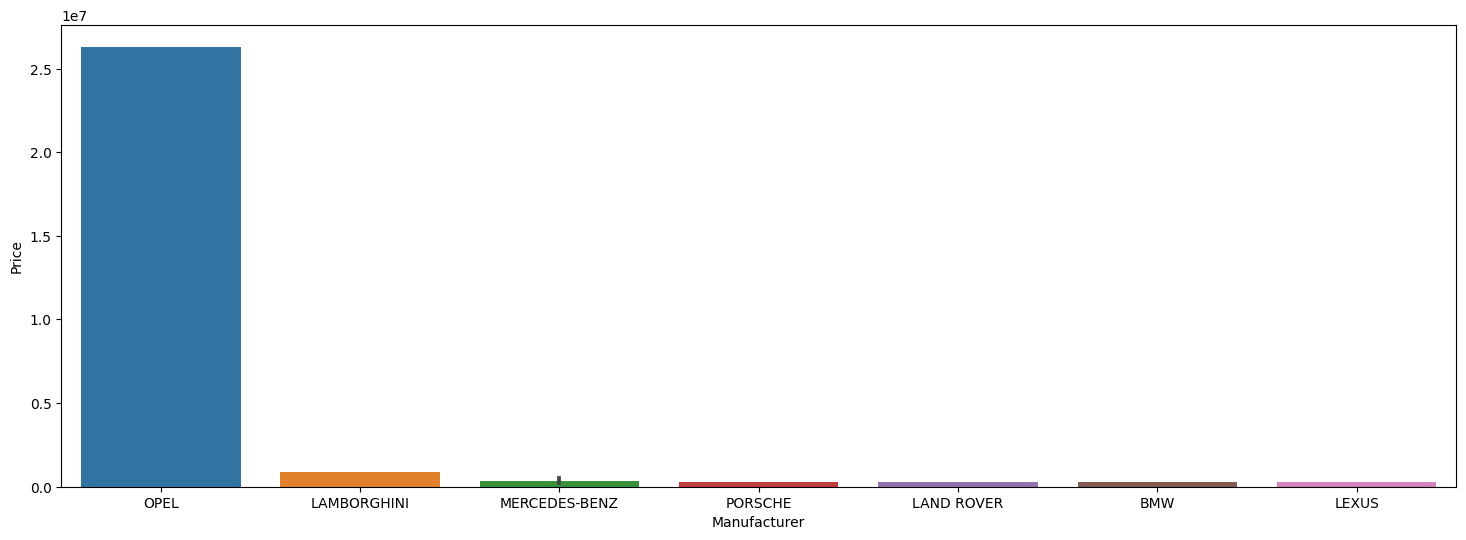

In [25]:
plt.figure(figsize=(18,6))
sns.barplot(x="Manufacturer",y="Price",data=data.sort_values(by="Price",ascending=False)[:10]);

<AxesSubplot: >

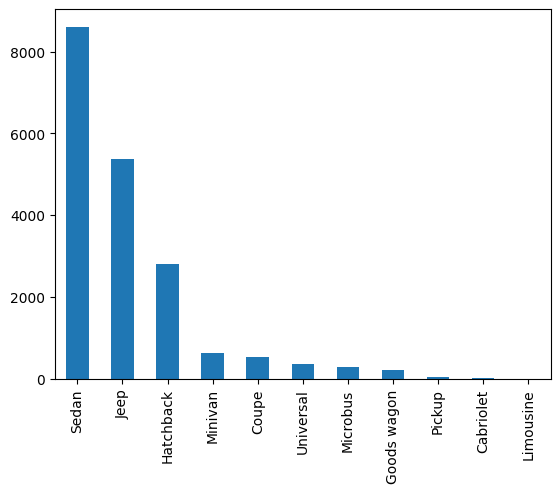

In [26]:
data.Category.value_counts().plot.bar()

<AxesSubplot: ylabel='Category'>

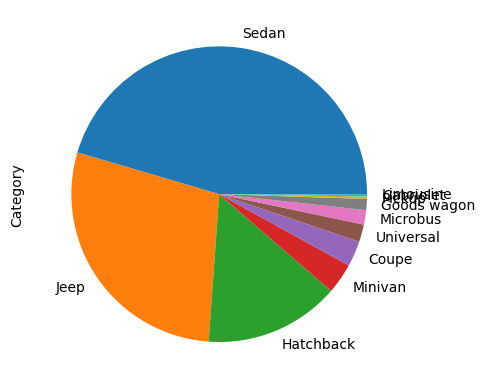

In [27]:
data.Category.value_counts().plot.pie()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64 

In [30]:
##Label encoding the categorical columns

In [34]:
cols=["Manufacturer","Model","Category","Leather interior","Fuel type","Gear box type","Drive wheels","Doors","Wheel","Color"]
le=LabelEncoder()
data[cols]=data[cols].apply(le.fit_transform)

In [35]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,32,1242,2010,4,1,2,3.5,186005 km,6.0,0,0,1,0,12,12
1,16621,1018,8,658,2011,4,0,5,3.0,192000 km,6.0,2,0,1,0,1,8
2,8467,-,21,684,2006,3,0,5,1.3,200000 km,4.0,3,1,1,1,1,2
3,3607,862,16,661,2011,4,1,2,2.5,168966 km,4.0,0,0,1,0,14,0
4,11726,446,21,684,2014,3,1,5,1.3,91901 km,4.0,0,1,1,0,12,4


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  object 
 2   Manufacturer      18924 non-null  int32  
 3   Model             18924 non-null  int32  
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  int32  
 6   Leather interior  18924 non-null  int32  
 7   Fuel type         18924 non-null  int32  
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  int32  
 12  Drive wheels      18924 non-null  int32  
 13  Doors             18924 non-null  int32  
 14  Wheel             18924 non-null  int32  
 15  Color             18924 non-null  int32  
 16  Airbags           18924 non-null  int64 

In [40]:
data['Levy']=data['Levy'].replace("-",np.nan)

In [41]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,32,1242,2010,4,1,2,3.5,186005 km,6.0,0,0,1,0,12,12
1,16621,1018,8,658,2011,4,0,5,3.0,192000 km,6.0,2,0,1,0,1,8
2,8467,NaN,21,684,2006,3,0,5,1.3,200000 km,4.0,3,1,1,1,1,2
3,3607,862,16,661,2011,4,1,2,2.5,168966 km,4.0,0,0,1,0,14,0
4,11726,446,21,684,2014,3,1,5,1.3,91901 km,4.0,0,1,1,0,12,4


In [42]:

data.dropna(inplace=True)

In [43]:
data["Mileage"]=data["Mileage"].str.replace("km","")

In [44]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,32,1242,2010,4,1,2,3.5,186005,6.0,0,0,1,0,12,12
1,16621,1018,8,658,2011,4,0,5,3.0,192000,6.0,2,0,1,0,1,8
3,3607,862,16,661,2011,4,1,2,2.5,168966,4.0,0,0,1,0,14,0
4,11726,446,21,684,2014,3,1,5,1.3,91901,4.0,0,1,1,0,12,4
5,39493,891,23,1305,2016,4,1,1,2.0,160931,4.0,0,1,1,0,14,4


In [46]:
data['Mileage']=data['Mileage'].astype(int)
data['Levy']=data['Levy'].astype(int)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13215 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13215 non-null  int64  
 1   Levy              13215 non-null  int32  
 2   Manufacturer      13215 non-null  int32  
 3   Model             13215 non-null  int32  
 4   Prod. year        13215 non-null  int64  
 5   Category          13215 non-null  int32  
 6   Leather interior  13215 non-null  int32  
 7   Fuel type         13215 non-null  int32  
 8   Engine volume     13215 non-null  float64
 9   Mileage           13215 non-null  int32  
 10  Cylinders         13215 non-null  float64
 11  Gear box type     13215 non-null  int32  
 12  Drive wheels      13215 non-null  int32  
 13  Doors             13215 non-null  int32  
 14  Wheel             13215 non-null  int32  
 15  Color             13215 non-null  int32  
 16  Airbags           13215 non-null  int64 

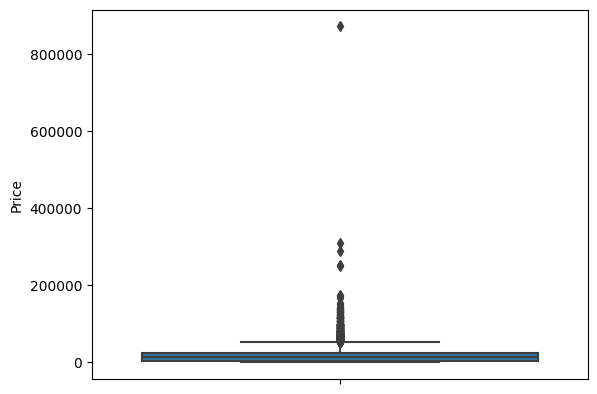

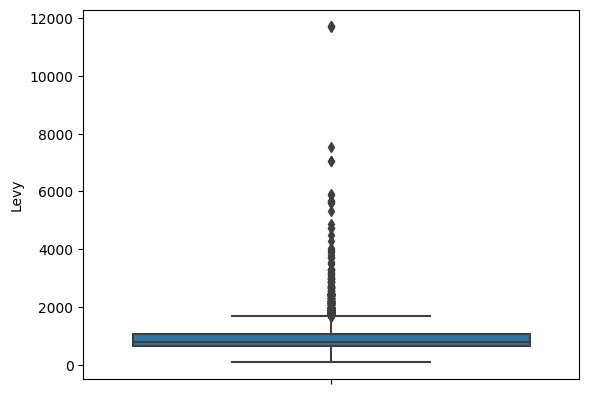

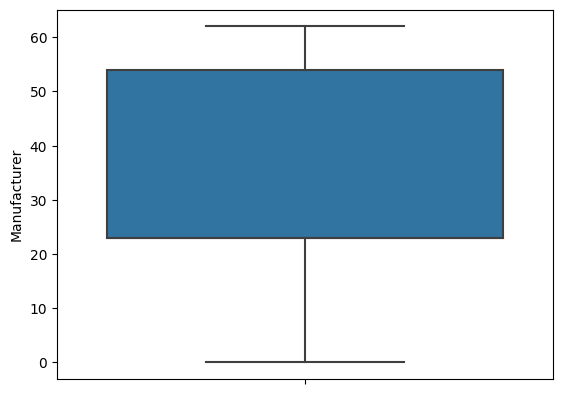

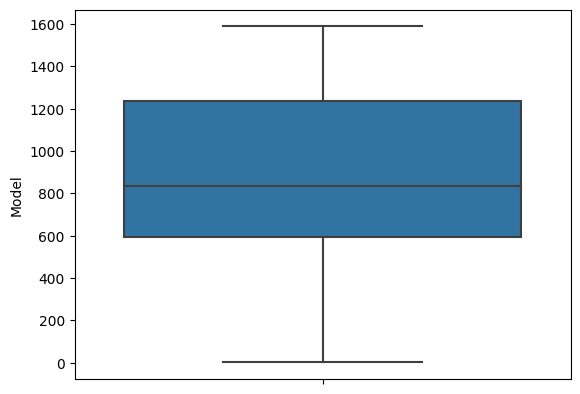

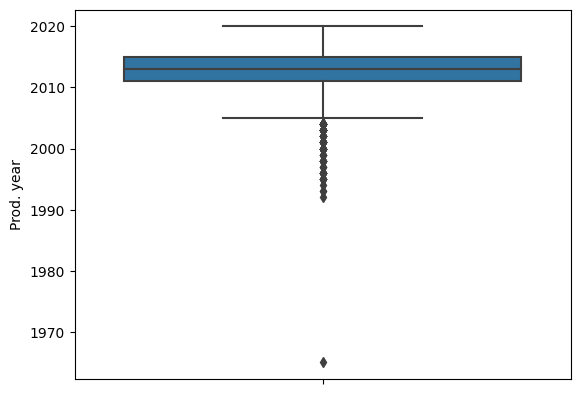

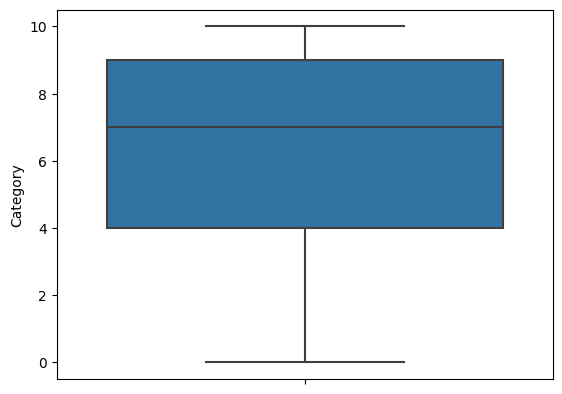

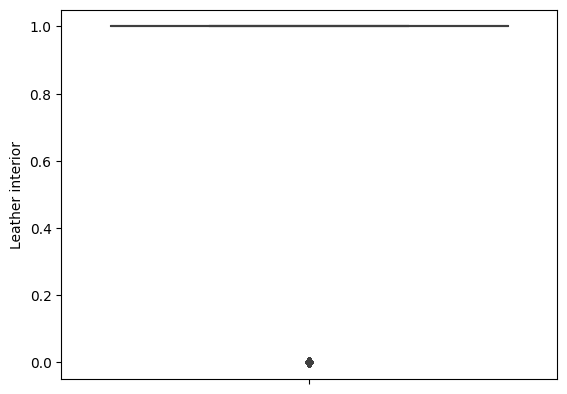

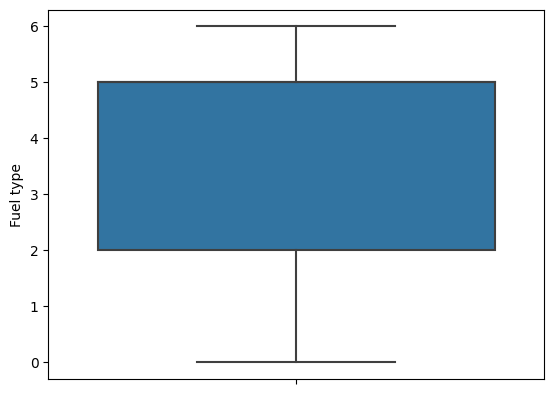

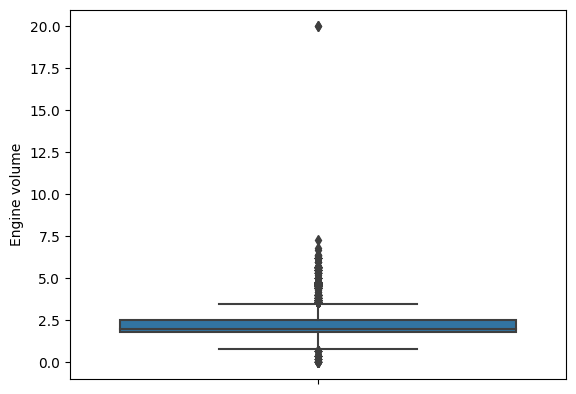

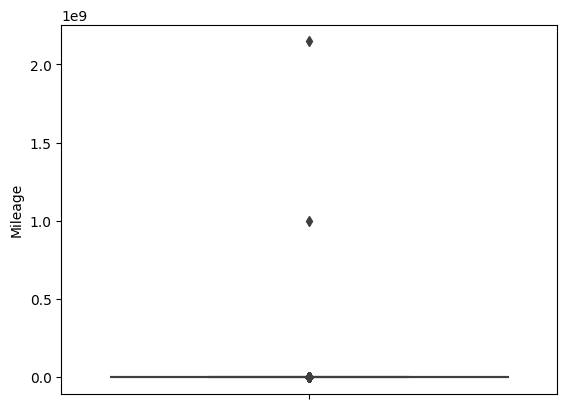

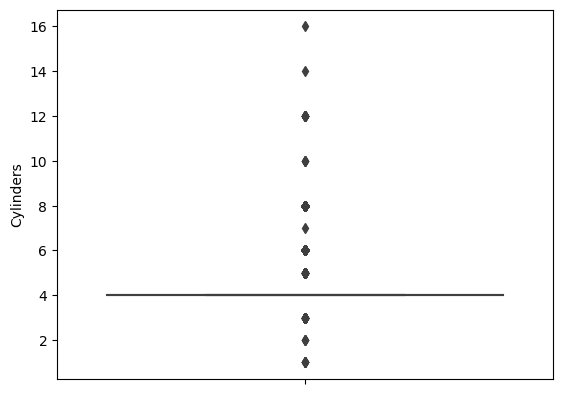

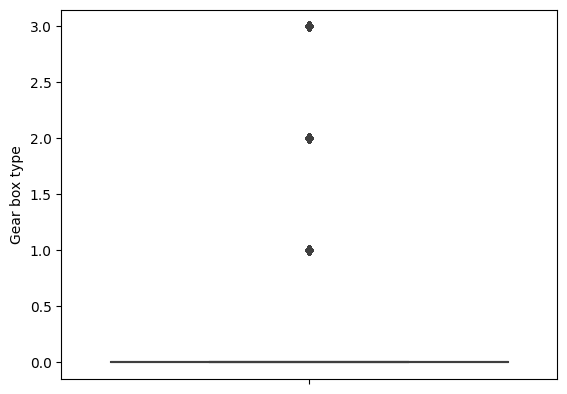

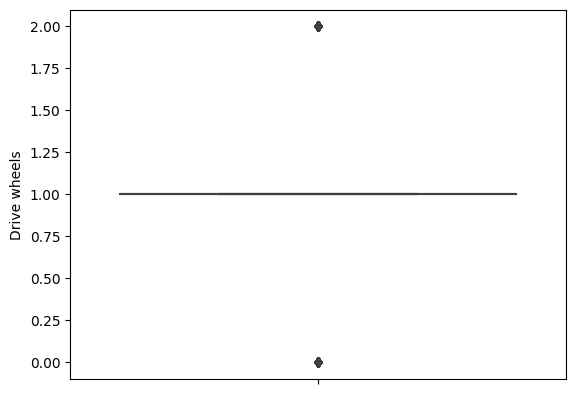

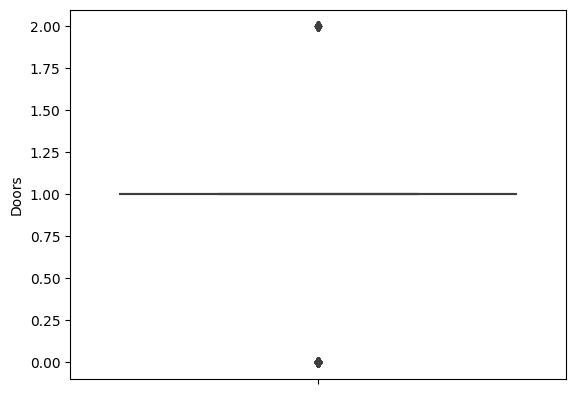

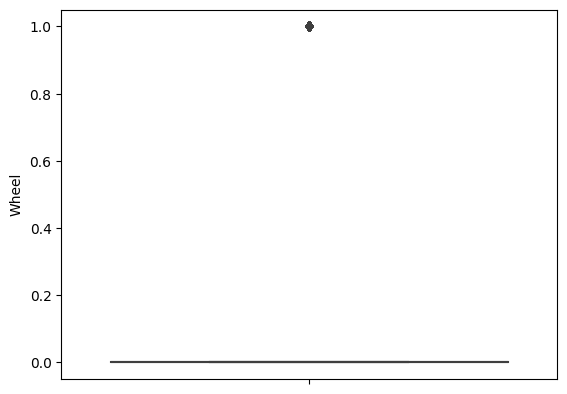

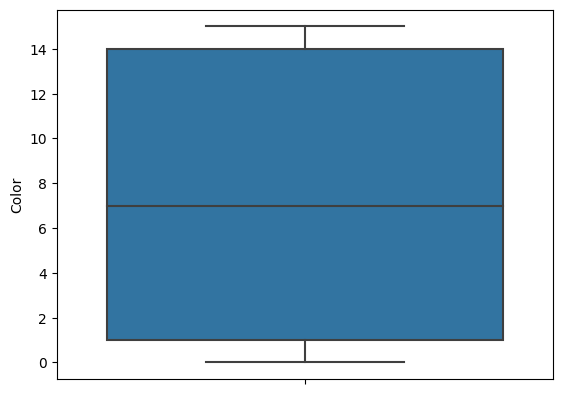

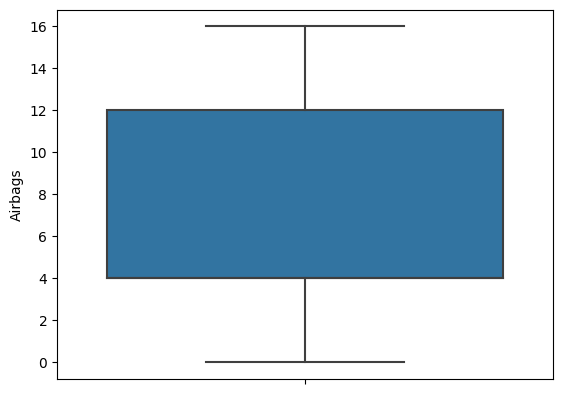

In [49]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i])
        plt.show()

In [50]:
##OUTLIER TREATMENT


In [51]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [55]:
for column in data.columns:
    if data[column].dtype!='object':
        UL,LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])

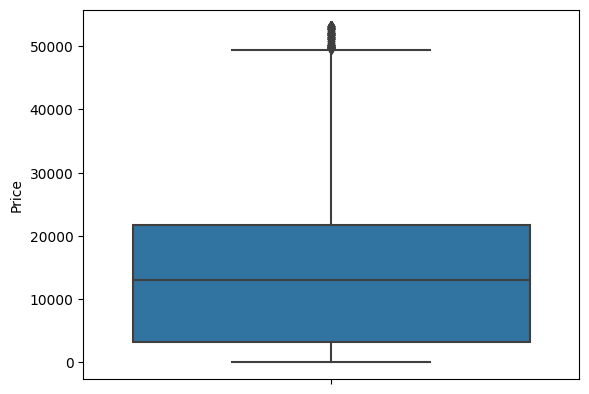

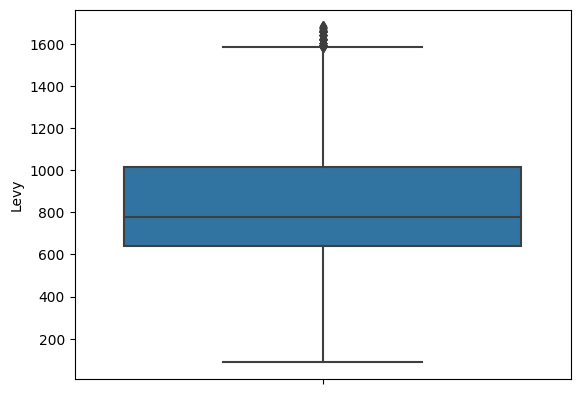

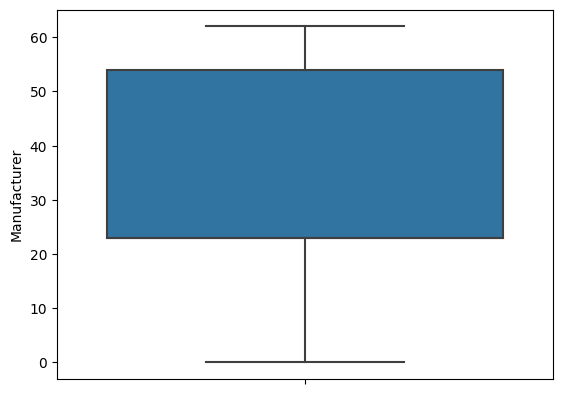

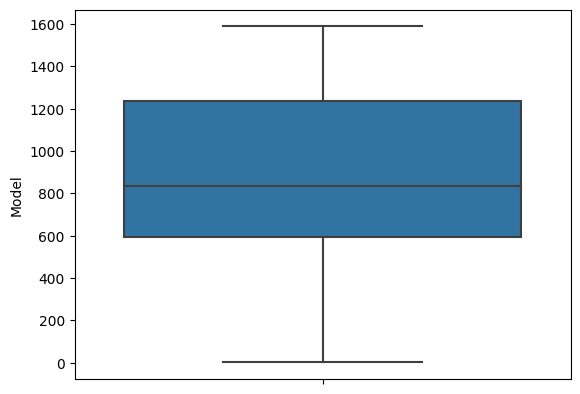

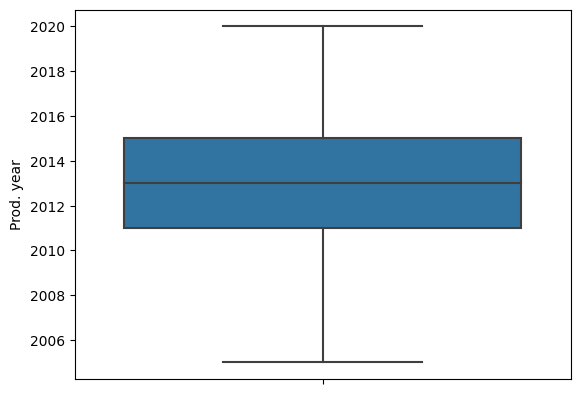

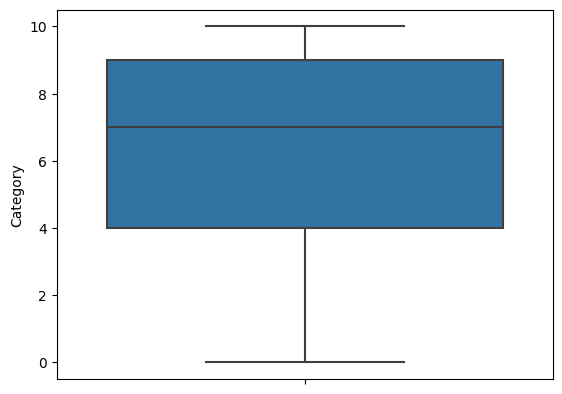

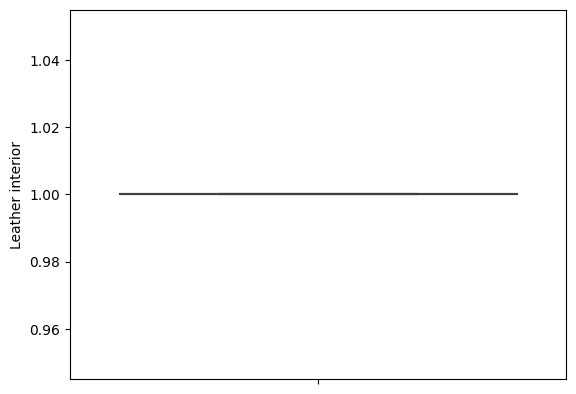

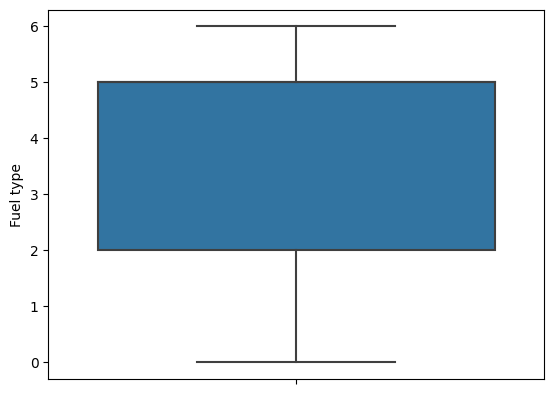

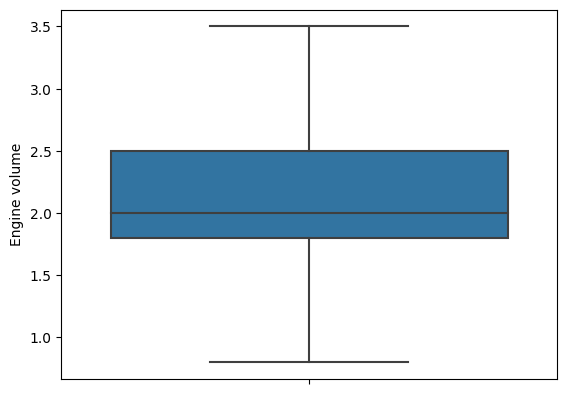

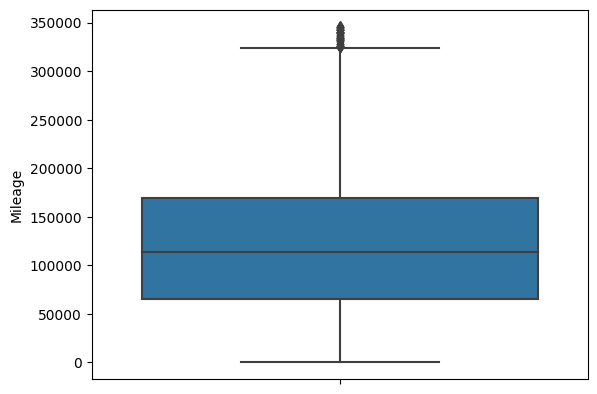

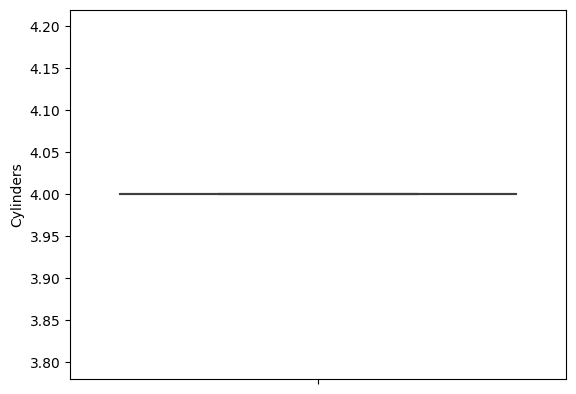

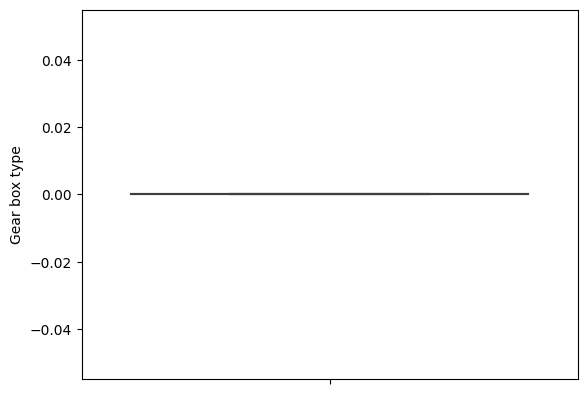

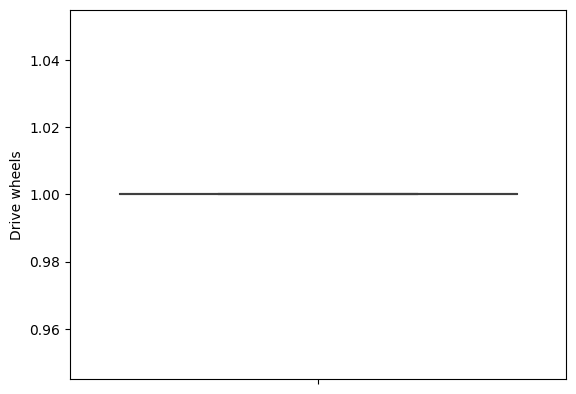

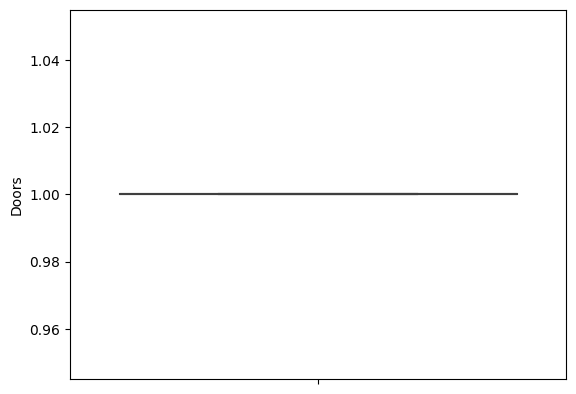

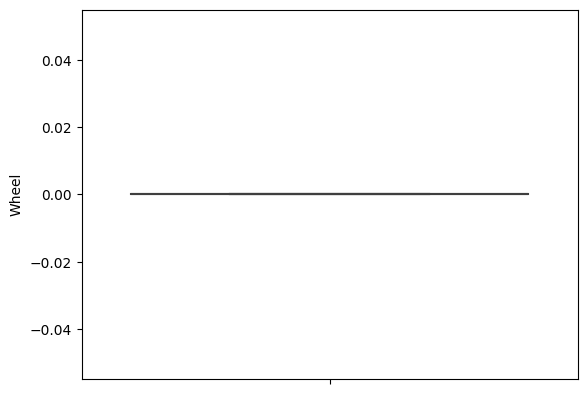

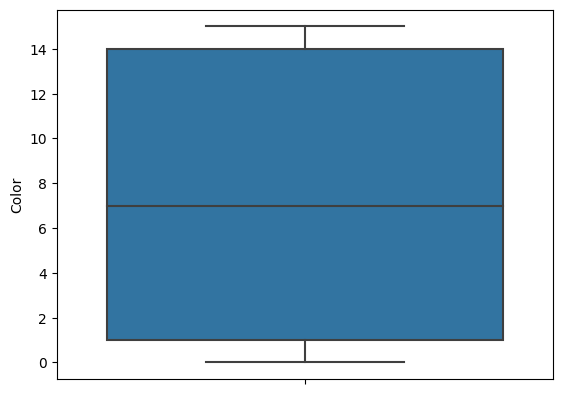

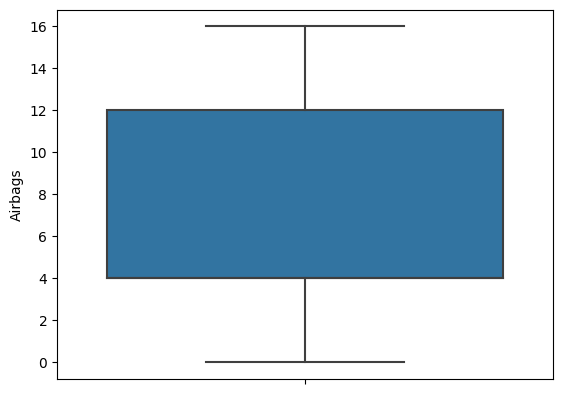

In [56]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot(y=data[i])
        plt.show()

In [57]:
data.dropna(inplace=True)

In [58]:
#Checking the correlation with the target

In [59]:
data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

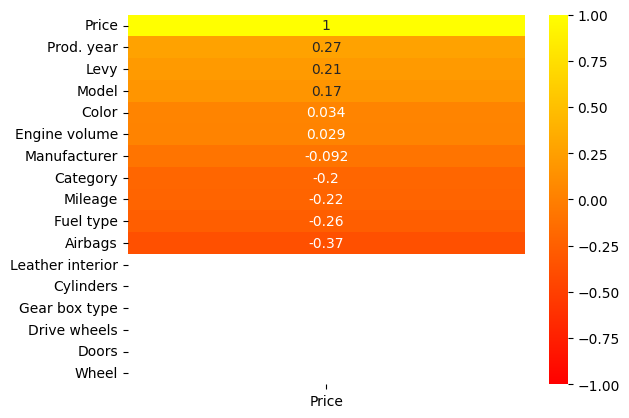

In [66]:
sns.heatmap(data.corr()[['Price']].sort_values(by="Price",ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

In [68]:
x=data[["Prod. year","Levy","Engine volume","Model"]].values
y=data[["Price"]].values

In [69]:
sc = StandardScaler()

In [70]:
x=sc.fit_transform(x)

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [72]:
 models={
'LinearRegression':LinearRegression(),
"Ridge":Ridge(),
"LinearSVR":LinearSVR(),
"DecisionTreeRegressor":DecisionTreeRegressor(),
"GradientBoostingRegressor":GradientBoostingRegressor(),
"AdaBoostRegressor":AdaBoostRegressor(),
"RandomForestRegressor":RandomForestRegressor()
}


In [74]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print("rmse_test:",rmse)
    print("*"*100)

model trained with LinearRegression
r2score: 14.246663802078352
training_score: 15.376789978368388
testing_score: 14.246663802078352
mae: 10805.481561336124
mse: 170594005.6386955
rmse_test: 13061.164023114306
****************************************************************************************************
model trained with Ridge
r2score: 14.24684899258083
training_score: 15.376789144000757
testing_score: 14.24684899258083
mae: 10805.51682377746
mse: 170593637.22866014
rmse_test: 13061.149919844735
****************************************************************************************************
model trained with LinearSVR
r2score: -101.37434148286091
training_score: -94.48488363633439
testing_score: -101.37434148286091
mae: 15096.147016616986
mse: 400605469.9391203
rmse_test: 20015.131024780236
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score: 71.77003684800324
training_score: 8

In [75]:
model=RandomForestRegressor()

In [76]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [77]:
y_pred=model.predict(x)

In [78]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,11726.0,20169.140544
1,39493.0,44664.123609
2,1803.0,5071.195164
3,549.0,3565.766691
4,549.0,6688.015346


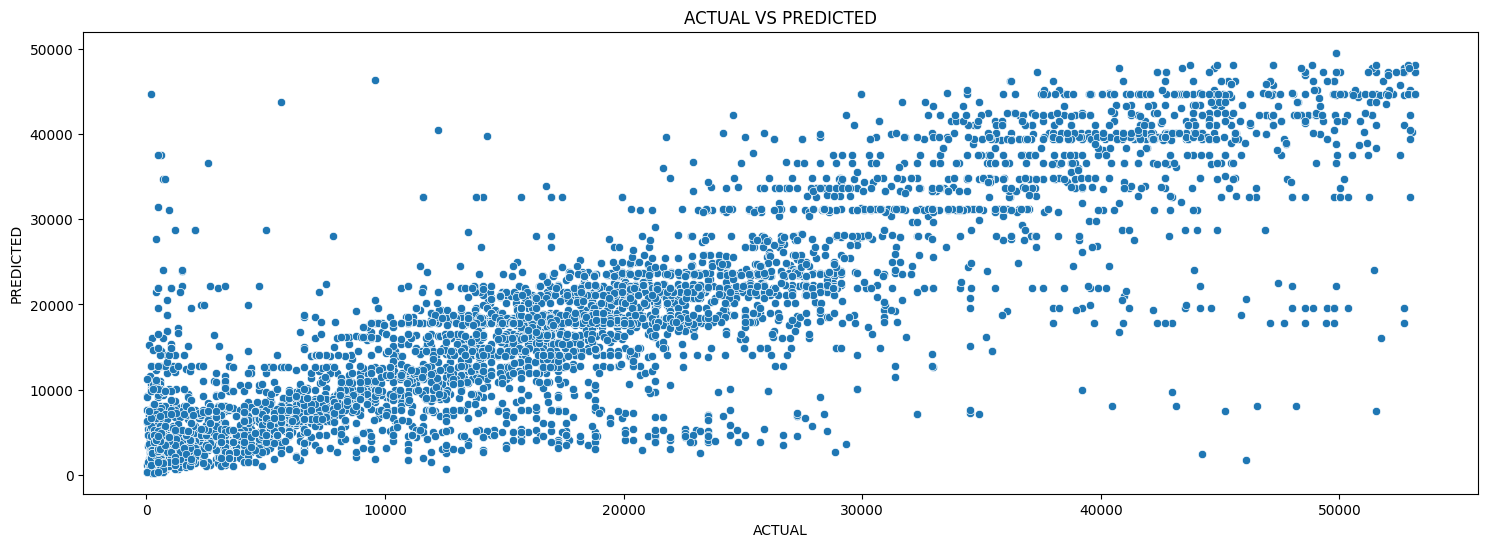

In [79]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTED")
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");